In [3]:
#!git clone https://github.com/Oindrikar16/network_traffic

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import socket, struct

import imblearn
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.under_sampling import NearMiss

In [5]:
!pip install kaggle

In [6]:
# installing from the local drive
#from google.colab import files


#uploaded = files.upload()

In [7]:
!pip install -U -q PyDrive

In [8]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [9]:
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [10]:
link = 'https://drive.google.com/file/d/1TG-cTzRJYxszH0lPtT_XqiMrroPjnR0n/view?usp=share_link'

import pandas as pd

# to get the id part of the file
id = link.split("/")[-2]

downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('network_data.csv')

df = pd.read_csv('network_data.csv')
print(df)

                                       Flow.ID      Source.IP  Source.Port  \
0          172.19.1.46-10.200.7.7-52422-3128-6    172.19.1.46        52422   
1          172.19.1.46-10.200.7.7-52422-3128-6     10.200.7.7         3128   
2         10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
3         10.200.7.217-50.31.185.39-38848-80-6   50.31.185.39           80   
4        192.168.72.43-10.200.7.7-55961-3128-6  192.168.72.43        55961   
...                                        ...            ...          ...   
3577291  10.200.7.199-98.138.79.73-42135-443-6   98.138.79.73          443   
3577292  10.200.7.217-98.138.79.73-51546-443-6   98.138.79.73          443   
3577293  10.200.7.218-98.138.79.73-44366-443-6   98.138.79.73          443   
3577294  10.200.7.195-98.138.79.73-52341-443-6   98.138.79.73          443   
3577295  10.200.7.196-98.138.79.73-34188-443-6   98.138.79.73          443   

        Destination.IP  Destination.Port  Protocol           Ti

In [11]:
#filepath = "network_traffic/data.csv"
#df = pd.read_csv(filepath)
df.head()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
0,172.19.1.46-10.200.7.7-52422-3128-6,172.19.1.46,52422,10.200.7.7,3128,6,26/04/201711:11:17,45523,22,55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
1,172.19.1.46-10.200.7.7-52422-3128-6,10.200.7.7,3128,172.19.1.46,52422,6,26/04/201711:11:17,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY
2,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,1,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
3,10.200.7.217-50.31.185.39-38848-80-6,50.31.185.39,80,10.200.7.217,38848,6,26/04/201711:11:17,217,1,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,7,HTTP
4,192.168.72.43-10.200.7.7-55961-3128-6,192.168.72.43,55961,10.200.7.7,3128,6,26/04/201711:11:17,78068,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,131,HTTP_PROXY


In [12]:
df.tail()

,Flow.ID,Source.IP,Source.Port,Destination.IP,Destination.Port,Protocol,Timestamp,Flow.Duration,Total.Fwd.Packets,Total.Backward.Packets,...,Active.Std,Active.Max,Active.Min,Idle.Mean,Idle.Std,Idle.Max,Idle.Min,Label,L7Protocol,ProtocolName
3577291,10.200.7.199-98.138.79.73-42135-443-6,98.138.79.73,443,10.200.7.199,42135,6,15/05/201705:43:40,2290821,5,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577292,10.200.7.217-98.138.79.73-51546-443-6,98.138.79.73,443,10.200.7.217,51546,6,15/05/201705:46:10,24,5,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577293,10.200.7.218-98.138.79.73-44366-443-6,98.138.79.73,443,10.200.7.218,44366,6,15/05/201705:45:39,2591653,6,5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577294,10.200.7.195-98.138.79.73-52341-443-6,98.138.79.73,443,10.200.7.195,52341,6,15/05/201705:45:59,2622421,4,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL
3577295,10.200.7.196-98.138.79.73-34188-443-6,98.138.79.73,443,10.200.7.196,34188,6,15/05/201705:46:05,2009138,3,2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,BENIGN,91,SSL


In [13]:
# Function that changes IP addresses into numbers

def ip2int(ip):
    packedIP = socket.inet_aton(ip)
    return struct.unpack("!L", packedIP)[0]

In [14]:
# Converting IP addresses into numbers
df['Source.IP'] = df['Source.IP'].apply(ip2int)
df['Destination.IP'] = df['Destination.IP'].apply(ip2int)


In [15]:
# Checking if any value in the dataframe is null
df.isnull().values.any()

False

In [16]:
# Checking types of values
print(df.dtypes)

Flow.ID              object
Source.IP             int64
Source.Port           int64
Destination.IP        int64
Destination.Port      int64
                     ...   
Idle.Max            float64
Idle.Min            float64
Label                object
L7Protocol            int64
ProtocolName         object
Length: 87, dtype: object


In [17]:
# Checking columns that have only one unique value
df.columns[df.nunique() <= 1]

Index(['Bwd.PSH.Flags', 'Fwd.URG.Flags', 'Bwd.URG.Flags', 'CWE.Flag.Count',
       'Fwd.Avg.Bytes.Bulk', 'Fwd.Avg.Packets.Bulk', 'Fwd.Avg.Bulk.Rate',
       'Bwd.Avg.Bytes.Bulk', 'Bwd.Avg.Packets.Bulk', 'Bwd.Avg.Bulk.Rate',
       'Label'],
      dtype='object')

In [18]:
# Checking occurance of each application
df['ProtocolName'].value_counts()

GOOGLE          959110
HTTP            683734
HTTP_PROXY      623210
SSL             404883
HTTP_CONNECT    317526
                 ...  
STARCRAFT            3
QQ                   2
99TAXI               1
SOCKS                1
NFS                  1
Name: ProtocolName, Length: 78, dtype: int64

In [19]:
# Features that will be removed from dataset because they have low occurances of records in dataset
feats_toDelete = df['ProtocolName'].value_counts()[-25:].index
feats_toDelete

Index(['H323', 'CNN', 'LASTFM', 'CITRIX', 'ORACLE', 'TEAMSPEAK', 'BGP', 'RTMP',
       'BITTORRENT', 'WHOIS_DAS', 'SKINNY', 'OPENSIGNAL', 'MAIL_IMAPS',
       'OSCAR', 'LOTUS_NOTES', 'SIMET', 'IP_OSPF', 'RADIUS', 'OPENVPN', 'SNMP',
       'STARCRAFT', 'QQ', '99TAXI', 'SOCKS', 'NFS'],
      dtype='object')

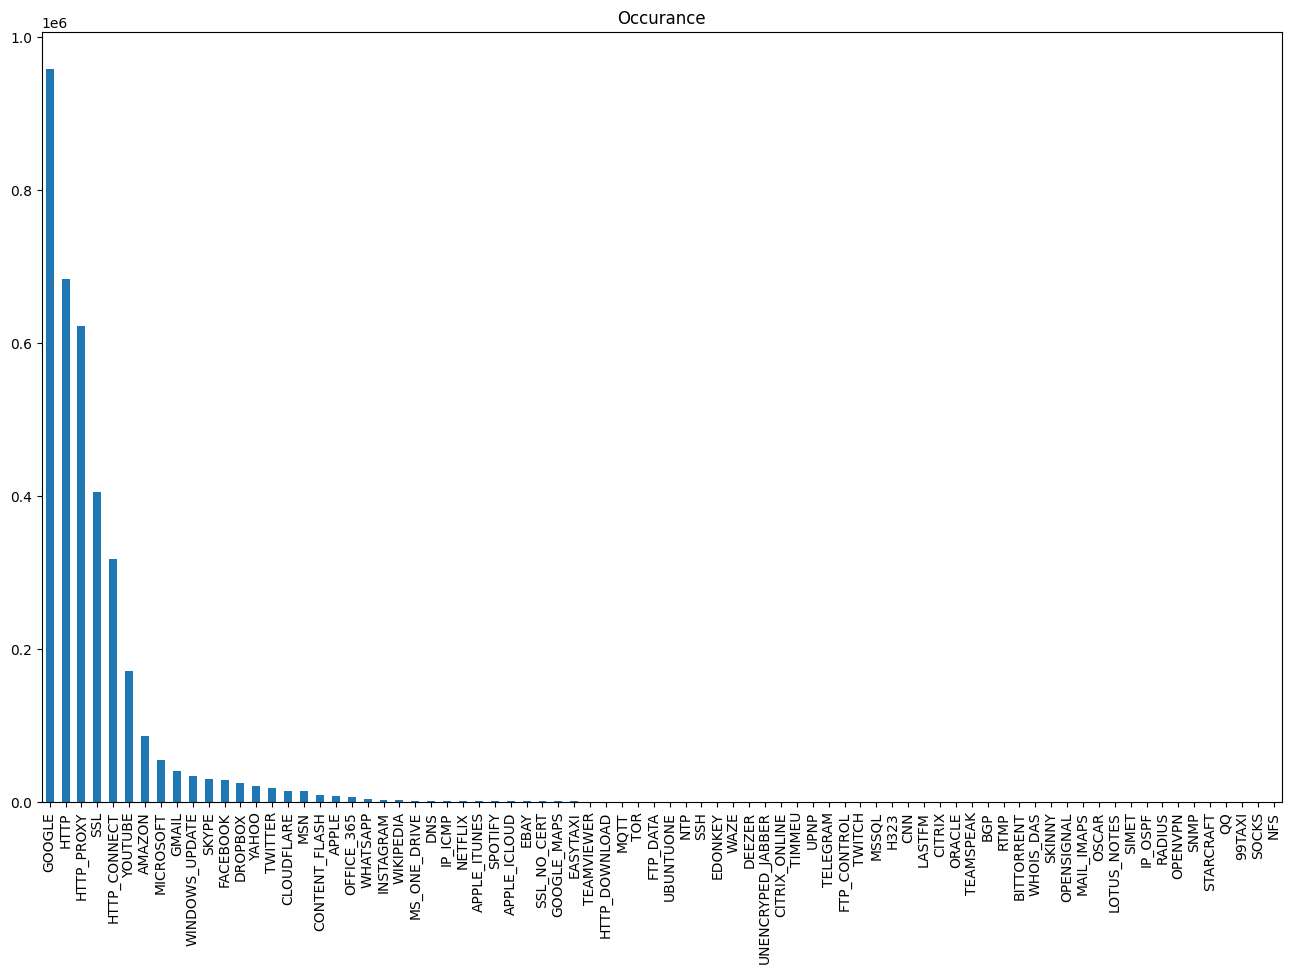

In [20]:
# Plot the number of records for individual applications
target_count = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count.plot(kind='bar', title='Occurance');

In [21]:
# Removal of the applications saved in feats_toDelete var because they occur in a small amount of records and do not have a major impact on the model
df = df[~df.ProtocolName.isin(feats_toDelete)]

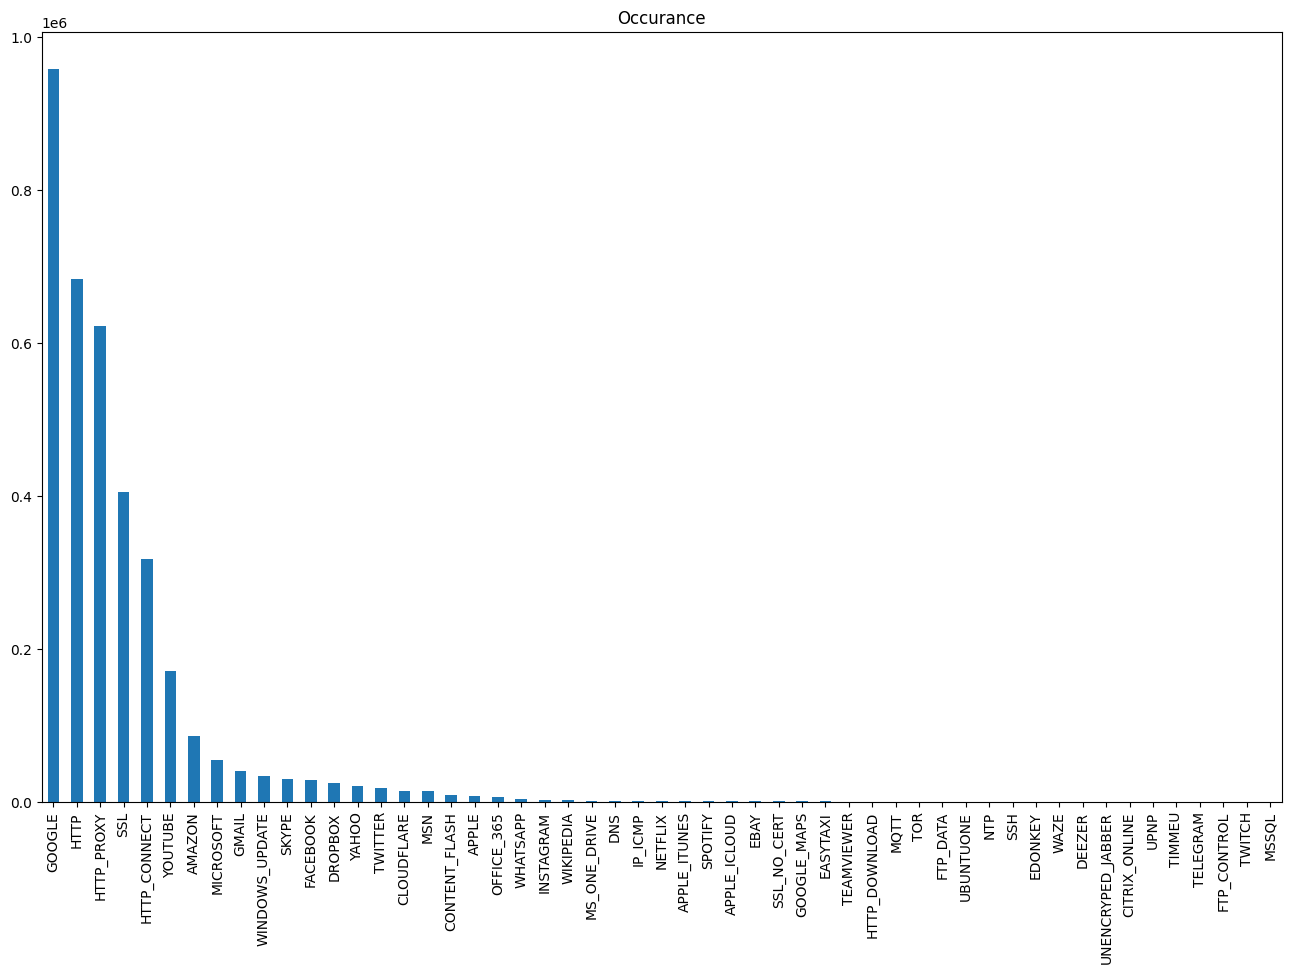

In [22]:
# Plot the number of records for individual applications one more time after some application removal
target_count2 = df['ProtocolName'].value_counts()
plt.figure(figsize=(16,10))
target_count2.plot(kind='bar', title='Occurance');

In [23]:
feats = [x for x in df.columns if x != 'ProtocolName']
X = df[feats].astype(float)
Y = df['ProtocolName']

ValueError: ignored